# Les Optimisations de mix de produits ( produits mix )

## Introduction.


Les optimisations de type mix de produits sont les premières abordées en optimisation.

Elles permettent d'optimiser la production et le rendement commercial d'une usine ou d'une organisation agricole, et d'éviter en premier ressort des logiques de production aberrantes.

Elles permettent à une usine de savoir quels produits il vaut mieux produire dans son éventail de produits, afin de maximiser son profit.


Un exemple d'optimisation mixe de produits pour une organisation agricole 
dans mon application www.solvgraph.com :
<div style="text-align:center">
<img src="img/product-mix1.png">
</div>

Dans ses versions non linéaires, elles permettent plus de sophistication et permettent de coller à la réalité.

Dans cette étude, je vais utiliser plusieurs solveurs, et faire des optimisations linéaires et non 
linéaires.

Etude globale proposée par <b>Estelle Derrien - Github15000</b>

CREATION EN COURS


# Sommaire 

- 1. Maximisation de profit <b>linéaire.</b>
        - Notre problème de base
        - Modélisation mathématique
        - Résolution avec Python Pulp
- 3. A quoi sert l'analyse de sensitivité ?
- 4. Ajout des coûts fixes et variables.
- 5. Forcer la production d'un élément.
- 6. Ajout de contraintes binaires/conditionnelles.
    - Coûts conditionnels
        - avec Pulp
        - avec Cplex
    - Associations conditionnelles
        - avec Pulp
        - avec Cplex
- 7. Ajout de "Multiples de".
- 8. Ajout de contraintes de coûts additionels.
    - Description
    - Résolution avec Python Pulp
- 9. Ajout de contraintes de coûts discontinues.
    - Description
    - Résolution avec Python Pulp
- 10. Ajout de contraintes Piecewize.
    - Description
    - Résolution avec Cplex
    - Résolution avec Python Pulp
- 11. Prise en compte des Invendus.
- 12. Maximisation de profit <b>non linéaire</b>
    - Notre problème de base
    - Modélisation mathématique
    - Exemple
    - Exemple avec boucles For
    - Résolution avec Python Gekko
        - Sans Boucle For
        - Avec Boucle For
    - Résolution avec Cplex
    - Ajout de contraintes binaires
    - Ajout de contraintes piecewize




# Maximisation de profit linéaire - Production de 3 objets.


# Notre problème de base.

- J'ai le choix entre 3 types de vaches : Charolaises, Blanc Bleuc et salers.

- J'ai 600 kgs de nourriture, 700 litres d'eau en stock .

- Chaque vache consomme respectivement 7kgs,7kgs,8kgs de nourriture par jour.

- Chaque vache consomme respectivement 4.5l,9l et 3l d'eau par jour.

- Chaque vache rapporte respectivement 100,110,et 115 euros.

Quelles vaches faut il produire afin de maximiser mon profit ?



# Modélisation Mathématique.

- Soit V un ensemble de vaches indicées par i (v1,v2,v3...vi)
- Soit Nij la nourriture consommée par chaque vache, c'est une matrice ( ou un tableau).
- Soit Eij l'eau consommée par chaque vache, c'est une matrice ( ou un tableau).
- Soit Pij le profit rapporté par chaque vache , c'est une matrice ( ou un tableau).
- Soit N la quantité de nourriture en stock
- Soit E la quantité d'eau en stock


Je veux maximiser mon profit  sous les contraintes de nourriture et d'eau.

Max  Σ Vi*Pij

s.t

Σ Nij*Vi <= N , ∀ n  ∈  {n1,n2,n3}

Σ Eij*Vi <= E , ∀ e  ∈  {e1,e2,e3}



# Résolution avec Python Pulp

Comme on a que 3 vaches, on peut résoudre sans utiliser les boucles FOR, qui paraissent un peu compliquées quand on débute.

In [129]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  9300.0


# Ajout des coûts fixes et variables.

Mon exploitation a un coût fixe de 1200 euros.
Chaque vache implique un coût variable de respectivement 10,12 et 9.5 euros.

Je veux inclure ces éléments à la fonction objectif afin qu'elle les prenne en compte lors de l'optimisation.

Note:  On est toujours dans le cadre d'un problème linéaire, les coûts variables des vaches est donc proportionnel au nombre de vache, chaque vache a un coût fixe directement appliqué, il ne diminue pas avec le nombre, si c'était le cas, on serait dans un problème non linéaire.

In [130]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)   

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * blanc_bleu + 
             (115 - cout_salers) * salers ) - cout_fixe

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  7322.0


# Forcer la production d'un élément.

On voit dans notre résultat que le solveur nous dit de ne pas produire de charolaises, afin de maximiser notre profit.
Mais je veux tout de même avoir 20 Charolaises au minimum dans mon cheptel et 20 salers au minimum, même si cela implique une perte de profit.


In [131]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)   

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * blanc_bleu + 
             (115 - cout_salers) * salers ) - cout_fixe

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20

# Minimum de 20 salers
Mon_Probleme += salers >= 20

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 36.0
charolaise = 20.0
salers = 26.0
Profit total maximisé =  7071.0


# Ajout de contrainte conditionnelle. (1)

Je veux que si mon cheptel de vaches blanc_bleu dépasse les 30 unités, un coût additionnel de main d'oeuvre de 30 euros soies appliqué.

In [132]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger) 

# Variable binaire On/Off
depassement_blanc_bleu =   p.LpVariable("depassement_blanc_bleu", 0, None, p.LpBinary)

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe -  30 * depassement_blanc_bleu

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700
# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20
# Minimum de 20 salers
Mon_Probleme += salers >= 20

# La variable binaire
# Si mon cheptel de blanc_bleu dépasse 30, alors la variable binaire est à 1 et le
# coût de 30 est soustrait de la fonction objectif, attention, c'est pris en compte
# en cours d'optimisation.
M = 1000  # M se calcule selon une certaine méthode ( BigM)
# si blanc_bleu > 30 alors z = 1 s'écrit comme cela avec PULP
Mon_Probleme += depassement_blanc_bleu  >= (blanc_bleu - 30 )/M

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 36.0
charolaise = 20.0
depassement_blanc_bleu = 1.0
salers = 26.0
Profit total maximisé =  7041.0


# Ajout de contrainte conditionnelle. (2)

Je veux que si mon cheptel de vaches blanc_bleu dépasse les 30 unités, un coût additionnel de main d'oeuvre de 30 euros soies appliqué.
Cette fois ci, on résouds avec le solveur <b>Python Cplex</b>, qui permet d'exprimer les contraintes conditionnelles très naturellement ( Mais il est payant..).

In [133]:
import cplex
import docplex.mp
from docplex.mp.model import Model

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')
depassement_blanc_bleu = model.binary_var(name='depassement_blanc_bleu')

# On crée la fonction objectif
model.maximize(((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe -  30 * depassement_blanc_bleu)

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)
model.add_constraint(charolaise >= 20)
model.add_constraint(salers >= 20)


# On spécifie le déclencheur de la contrainte depassement_blanc_bleu, 
# qui dit que si la production de vaches blanc_bleu dépasse 30, 
# alors le coût de 30 euros est soustrait dans la fonction objectif
#if then constraint
model.add_constraint(model.if_then(blanc_bleu >= 30, depassement_blanc_bleu == 1))


model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()


Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 7041.000
status: OPTIMAL_SOLUTION(2)
  "charolaise"=20
  "blanc_bleu"=36
  "salers "=26
  "depassement_blanc_bleu"=1


# Associations conditionnelles (Avec Pulp)

Si les vaches blancs bleus dépassent 20, alors les vaches salers doivent dépasser 15.


In [134]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger) 

# Variable binaire On/Off
association =   p.LpVariable("association", 0, None, p.LpBinary)

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe 

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700
# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20
# Si le nobre de blanc_bleu dépasse 20, alors, il  doit y avoir au moins 15 vaches salers
Mon_Probleme += salers >= association * 15

# Setting de la variable binaire avec la méthode BigM
M = 1000  
Mon_Probleme += association  >= (blanc_bleu - 20 )/M

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

association = 1.0
blanc_bleu = 44.0
charolaise = 20.0
salers = 19.0
Profit total maximisé =  7116.5


# Associations conditionnelles (Avec Cplex)

Si les vaches blancs bleus dépassent 20, alors les vaches salers doivent dépasser 15.

In [135]:
# A venir ...

# Ajout de "multiple de "

On revient sur notre problème de base,

On va ajouter une contrainte qui dit que pour toute vache Blanc bleu produite, alors il faut produire 2 vaches salers.

In [136]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Contrainte de multiplicité :
# 1 charolaise produite, on doit avoir 2 salers
Mon_Probleme += charolaise  * 2 == salers

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 4.0
salers = 8.0
Profit total maximisé =  9240.0


# Ajout de contraintes de coûts additives

- Si la production de vaches blanc_bleu > 0, alors le côut de maintenance est de 20
- Si la production de vaches blanc_bleu > 20, alors le côut de maintenance est de 30 euros supplémentaires 
- Si la production de vaches blanc_bleu > 50, alors le côut de maintenance est de 30 euros supplémentaires

In [137]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')
# Les variables binaires
depassement_0 = model.binary_var(name='depassement_0')
depassement_20 = model.binary_var(name='depassement_20')
depassement_50 = model.binary_var(name='depassement_50')

# On crée la fonction objectif
model.maximize(100 * charolaise + 110 * blanc_bleu + 115 * salers 
               - depassement_0 * 20 - depassement_20 * 30 - depassement_50 * 50) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)


# Contraintes de coûts additives
# On crée les contraintes binaires qui vont activer ou pas les couts dans la fonction objectif
model.add_constraint(model.if_then(blanc_bleu >= 0, depassement_0 == 1))
model.add_constraint(model.if_then(blanc_bleu >= 20, depassement_20 == 1))
model.add_constraint(model.if_then(blanc_bleu >= 50, depassement_50 == 1))

model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 9200
status: OPTIMAL_SOLUTION(2)
  "blanc_bleu"=72
  "salers "=12
  "depassement_0"=1
  "depassement_20"=1
  "depassement_50"=1


# Ajout de contraintes discontinues.

# Description :

- Si la production de vaches blanc_bleu > 0, alors le côut de maintenance est de 20
- Si la production de vaches blanc_bleu > 20, alors le côut de maintenance est de 30 euros
- Si la production de vaches blanc_bleu > 50, alors le côut de maintenance est de 50 euros 

- Note importante :
Les coûts sont toujours pris en compte lors de l'optimisation, lorsque le simplexe est exécuté.
C'est à dire que le solveur prends en compte les coûts fixes cités plus haut et du coup, risque de choisir moins de vaches blanc bleus.

# Graphique de nos contraintes discontinues.


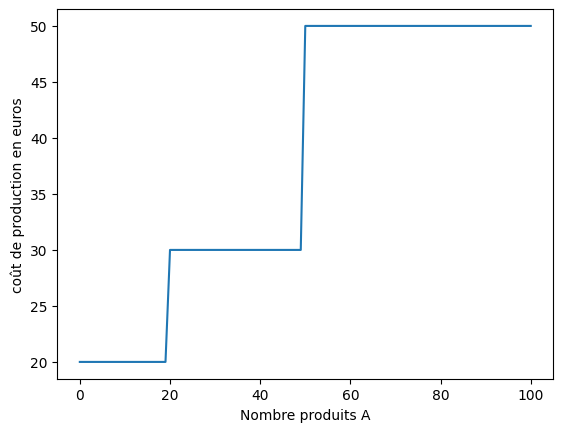

In [138]:
import matplotlib.pyplot as plt
plt.plot([0, 19, 20, 49,50,100], [20,20,30, 30, 50 ,50])
plt.xlabel('Nombre produits A')
plt.ylabel('coût de production en euros')
plt.show()

# Résolution avec Python Cplex

In [139]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')

# On définit la fonction piecewize de type discontinue
f = model.piecewise(0, [(0, 20), (20, 30), (50, 50)],1)

# On crée la fonction objectif
# On maximise moins les coûts provenant de la fonction piecewize f(x)
model.maximize(100 * charolaise + 110 * blanc_bleu  + 115 * salers - f(blanc_bleu)) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)

# Résoudre
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 9228.000
status: OPTIMAL_SOLUTION(2)
  "blanc_bleu"=72
  "salers "=12


# Ajout de contraintes piecewize

Les contraintes piecewize permettent de linéariser une fonction côut non linéaire.



# Résolution avec Python Cplex

Il existe 2 méthodes, on choisit celle avec les breakpoints.

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
charolaise  =  0
blanc_bleu  =  72.0
salers   =  12.0
_pwl3  =  52.2
solution for: maximisation_de_profit_agricole
objective: 9247.8
status: OPTIMAL_SOLUTION(2)
blanc_bleu=72
salers =12



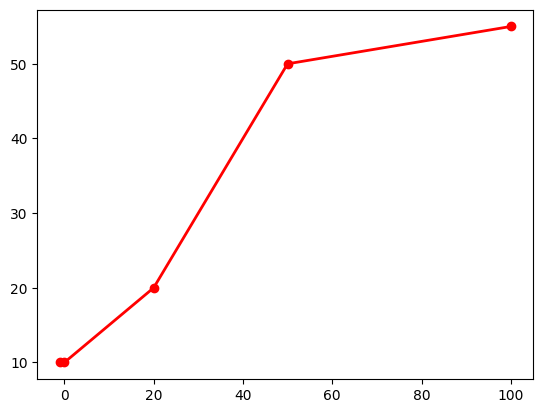

In [140]:
import cplex
import docplex.mp
from docplex.mp.model import Model


# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')

# On crée les fonctions piecewize avec leur breakpoints
pwf2 = model.piecewise(preslope=0, breaksxy=[(0, 10), (20, 20), (50, 50)], postslope=0.1)


# On crée cette contrainte pour contrôler 
# si les couts piecewize fonctionnent quand on change la valeur
# model.add_constraint(a  <= 1000)

# On crée la fonction objectif
# On maximise notre profit, moins les couts de type piecewize
model.maximize(100 * charolaise + 110 * blanc_bleu  + 115 * salers - pwf2(blanc_bleu)) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)

model.parameters.mip.display.set(0)
model.solve()

for v in model.iter_integer_vars():
    print(v," = ",v.solution_value) 

for v in model.iter_continuous_vars():
    print(v," = ",v.solution_value) 

for v in model.iter_binary_vars():
    print(v," = ",v.solution_value) 

print(model.solution)

# On dessine les fonctions de couts piecewize
pwf2.plot(lx=-1, rx=100, k=1, color='r', marker='o', linewidth=2)

# 11. Prise en compte des invendus

A venir ...